In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate, LSTM, Bidirectional, Masking
tf.config.threading.set_inter_op_parallelism_threads(6)

In [3]:

import pandas as pd
import numpy as np

df_train=pd.read_csv("selected_laws_train_new.csv")
df_train

,decision_id,facts,considerations,laws,onehot_law_area,onehot_language
0,000127ef-17d2-4ded-8621-c0c962c18fd5,"Sachverhalt:\nA.\nA._, geboren 1954, war ab No...",Erwägungen:\n1.\n1.1. Die Beschwerde kann wege...,"[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...","[0.0, 0.0, 0.0, 1.0, 0.0]","[1.0, 0.0, 0.0]"
1,00015fba-e922-4f05-ae7c-7cfcb823ff54,"Faits :\nA.\nA.a. En 1996, B.X._, domicilié à ...",Considérant en droit :\nI. Recevabilité et poi...,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 1.0, 0.0, 0.0]","[0.0, 1.0, 0.0]"
2,0003a8f8-ea59-41bb-b3d6-dd58de43ef44,Sachverhalt:\nA. Die Staatsanwaltschaft des Ka...,Erwägungen:\n1. Gemäss <ref-law> beurteilt das...,"[1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, ...","[0.0, 0.0, 1.0, 0.0, 0.0]","[1.0, 0.0, 0.0]"
3,00074c77-8f73-475c-a7fa-94fd080cf449,"Sachverhalt:\nA. A.A._ und B.A._ (Verpächter, ...",Erwägungen:\n1. 1.1 Die Beschwerde richtet sic...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, ...","[1.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0]"
4,000753ed-dd5e-4dfc-acb4-0f25fee7ae9b,"Sachverhalt:\nA.\nA._, U._ (AR), hält eine gro...",Erwägungen:\n1.\n1.1. Der in Anwendung des Tie...,"[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 1.0, 0.0, 0.0]","[1.0, 0.0, 0.0]"
...,...,...,...,...,...,...
81201,ffeb02ed-b799-4baa-ab45-6edecb882de6,Sachverhalt:\nA.\nDer Verein Schweizer Provinz...,Erwägungen:\n1.\n1.1. Angefochten ist ein kant...,"[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 1.0, 0.0, 0.0]","[1.0, 0.0, 0.0]"
81202,ffebeb4f-b03c-4fb1-a107-31fe33effd9e,"La Juge suppléante chargée de l'instruction, v...",considérant :\nqu'il convient de constater que...,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 1.0, 0.0, 0.0]","[0.0, 1.0, 0.0]"
81203,fff40230-89e1-4a9a-a2bb-c975e725afe5,"Faits :\nA.\nA.a. Le 23 décembre 2015, l'Aérop...",Considérant en droit :\n1.\n1.1. L'arrêt attaq...,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 1.0, 0.0, 0.0]","[0.0, 1.0, 0.0]"
81204,fffbe655-d320-4619-bb0a-45eb18f67def,"Sachverhalt:\nA.\nA.a. Der 1976 geborene A._, ...",Erwägungen:\n1.\nMit der Beschwerde in öffentl...,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...","[0.0, 0.0, 0.0, 1.0, 0.0]","[1.0, 0.0, 0.0]"


In [4]:
import ast
df_train['laws'] = df_train['laws'].apply(ast.literal_eval)
df_train['onehot_law_area'] = df_train['onehot_law_area'].apply(ast.literal_eval)
df_train['onehot_language'] = df_train['onehot_language'].apply(ast.literal_eval)

In [ ]:

import pandas as pd
import numpy as np

df_test=pd.read_csv("processed data new\\selected_laws_test_new.csv")
df_test

In [ ]:
df_test['laws'] = df_test['laws'].apply(ast.literal_eval)
df_test['onehot_law_area'] = df_test['onehot_law_area'].apply(ast.literal_eval)
df_test['onehot_language'] = df_test['onehot_language'].apply(ast.literal_eval)

In [5]:
class_weights = np.load("class_weights_equal.npy")
print(class_weights)

[  1.           1.           1.           3.00615831   3.00615831
   3.00615831   5.16445897   5.16445897   5.16445897   5.20610422
   5.20610422   5.20610422   5.67343853   5.67343853   5.67343853
   5.82705745   5.82705745   5.82705745   7.34189288   7.34189288
   7.34189288   7.93471653   7.93471653   7.93471653   9.3683882
   9.3683882    9.3683882   15.02176632  15.02176632  15.02176632
  16.04543025  16.04543025  16.04543025  17.74815253  17.74815253
  17.74815253  19.13994262  19.13994262  19.13994262  20.09437751
  20.09437751  20.09437751  23.46307151  23.46307151  23.46307151
  25.21713566  25.21713566  25.21713566  31.86942675  31.86942675
  31.86942675  32.89972603  32.89972603  32.89972603  35.25660599
  35.25660599  35.25660599  42.82596291  42.82596291  42.82596291
  43.82627737  43.82627737  43.82627737  45.0089955   45.0089955
  45.0089955   54.23848238  54.23848238  54.23848238  54.58363636
  54.58363636  54.58363636  78.48627451  78.48627451  78.48627451
  91.2492401

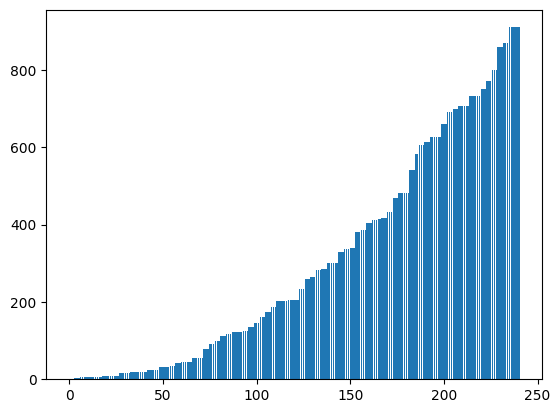

In [ ]:
import matplotlib.pyplot as plt

plt.bar(range(241), class_weights.tolist())
plt.show()

In [6]:
w = tf.constant(class_weights, dtype=tf.float32)

@tf.keras.utils.register_keras_serializable()
def weighted_bce(y_true, y_pred):
    y_pred = tf.clip_by_value(y_pred, 1e-7, 1 - 1e-7)
    loss = - w * (y_true * tf.math.log(y_pred) + (1 - y_true) * tf.math.log(1 - y_pred))
    #loss = - (y_true * tf.math.log(y_pred) + (1 - y_true) * tf.math.log(1 - y_pred))
    return tf.reduce_mean(tf.reduce_sum(loss, axis=1))


In [7]:
#average(class) recall

@tf.keras.utils.register_keras_serializable()
def avg_recall(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.round(y_pred)
    tp = tf.reduce_sum(y_true * y_pred, axis=0)
    fn = tf.reduce_sum(y_true * (1 - y_pred), axis=0)

    recall = tf.math.divide_no_nan(tp, tp + fn)
    return tf.reduce_mean(recall)

@tf.keras.utils.register_keras_serializable()
def avg_precision(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.round(y_pred)
    tp = tf.reduce_sum(y_true * y_pred, axis=0)
    fp = tf.reduce_sum((1 - y_true) * y_pred, axis=0)

    precision = tf.math.divide_no_nan(tp, tp + fp)
    return tf.reduce_mean(precision)


In [8]:
#weighted(class) recall

@tf.keras.utils.register_keras_serializable()
def wei_recall(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.round(y_pred)
    tp = tf.reduce_sum(y_true * y_pred, axis=0)
    fn = tf.reduce_sum(y_true * (1 - y_pred), axis=0)

    recall = tf.math.divide_no_nan(tp, tp + fn)
    return tf.reduce_sum((w / tf.reduce_sum(w)) * recall)

@tf.keras.utils.register_keras_serializable()
def wei_precision(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.round(y_pred)
    tp = tf.reduce_sum(y_true * y_pred, axis=0)
    fp = tf.reduce_sum((1 - y_true) * y_pred, axis=0)

    precision = tf.math.divide_no_nan(tp, tp + fp)
    return tf.reduce_sum((w / tf.reduce_sum(w)) * precision)


In [ ]:
#individual recall

def ind_recall(y_true, y_pred):
    y_pred = tf.round(y_pred)
    y_true = tf.cast(y_true, tf.float32)
    tp = tf.reduce_sum(y_true * y_pred, axis=0)
    fn = tf.reduce_sum(y_true * (1 - y_pred), axis=0)

    recall = tf.math.divide_no_nan(tp, tp + fn)
    return recall


def ind_precision(y_true, y_pred):
    y_pred = tf.round(y_pred)
    y_true = tf.cast(y_true, tf.float32)
    tp = tf.reduce_sum(y_true * y_pred, axis=0)
    fp = tf.reduce_sum((1 - y_true) * y_pred, axis=0)

    precision = tf.math.divide_no_nan(tp, tp + fp)
    return precision


In [24]:
input_1 = Input(shape=(5,), name='law_area')
input_2 = Input(shape=(3,), name='language')

input_3 = Input(shape=(30, 768), name='facts')
input_4 = Input(shape=(40, 768), name='considerations')

masked_3 = Masking(mask_value=0.0)(input_3)
masked_4 = Masking(mask_value=0.0)(input_4)

b1 = Bidirectional(LSTM(128, use_cudnn=False), name='facts_lstm')(masked_3)  #outputs 256
b1 = Dense(250, activation='relu', name='facts_dense')(b1)

b2 = Bidirectional(LSTM(128, use_cudnn=False), name='considerations_lstm')(masked_4)
b2 = Dense(250, activation='relu', name='considerations_dense')(b2)

merged = Concatenate()([input_1, input_2, b1, b2])

output = Dense(350, activation='relu', name='concatenate_dense1')(merged)
output = Dense(241, activation='sigmoid', name='output_layer')(output)

model = tf.keras.Model(inputs=[input_1, input_2, input_3, input_4], outputs=output)
model.compile(
    loss=weighted_bce,
    optimizer='adam',
    metrics=[avg_recall, avg_precision, wei_recall, wei_precision]
)

model.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ facts (InputLayer)  │ (None, 30, 768)   │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ considerations      │ (None, 40, 768)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_10        │ (None, 30, 768)   │          0 │ facts[0][0]       │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_11        │ (None, 40, 768)   │          0 │ considerations[0… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ masking_10          │ (None, 30, 768)   │          0 │ facts[0][0]       │
│ (Masking)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ any_10 (Any)        │ (None, 30)        │          0 │ not_equal_10[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ masking_11          │ (None, 40, 768)   │          0 │ considerations[0… │
│ (Masking)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ any_11 (Any)        │ (None, 40)        │          0 │ not_equal_11[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ facts_lstm          │ (None, 256)       │    918,528 │ masking_10[0][0], │
│ (Bidirectional)     │                   │            │ any_10[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ considerations_lstm │ (None, 256)       │    918,528 │ masking_11[0][0], │
│ (Bidirectional)     │                   │            │ any_11[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ law_area            │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ language            │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ facts_dense (Dense) │ (None, 250)       │     64,250 │ facts_lstm[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ considerations_den… │ (None, 250)       │     64,250 │ considerations_l… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 508)       │          0 │ law_area[0][0],   │
│ (Concatenate)       │                   │            │ language[0][0],   │
│                     │                   │            │ facts_dense[0][0… │
│                     │                   │            │ considerations_d… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_dense1  │ (None, 350)       │    178,150 │ concatenate_4[0]… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_layer        │ (None, 241)       │     84,591 │ concatenate_dens… │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴─────────────────

 Total params: 2,228,297 (8.50 MB)

 Trainable params: 2,228,297 (8.50 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
#no wrapper

input_1 = Input(shape=(5,), name='law_area')
input_2 = Input(shape=(3,), name='language')

input_3 = Input(shape=(30, 768), name='facts')
input_4 = Input(shape=(40, 768), name='considerations')

# Masking
masked_3 = Masking(mask_value=0.0, name='masking_facts')(input_3)
masked_4 = Masking(mask_value=0.0, name='masking_considerations')(input_4)

# Facts: forward LSTM
fw_3 = LSTM(
    128,
    return_sequences=False,
    use_cudnn=False,
    implementation=1,
    name='facts_lstm_fw'
)(masked_3)

# Facts: backward LSTM
bw_3 = LSTM(
    128,
    go_backwards=True,
    return_sequences=False,
    use_cudnn=False,
    implementation=1,
    name='facts_lstm_bw'
)(masked_3)

# Concatenate forward and backward
b1 = Concatenate(name='facts_concat')([fw_3, bw_3])
b1 = Dense(250, activation='relu', name='facts_dense')(b1)

# Considerations: forward LSTM
fw_4 = LSTM(
    128,
    return_sequences=False,
    use_cudnn=False,
    implementation=1,
    name='considerations_lstm_fw'
)(masked_4)

# Considerations: backward LSTM
bw_4 = LSTM(
    128,
    go_backwards=True,
    return_sequences=False,
    use_cudnn=False,
    implementation=1,
    name='considerations_lstm_bw'
)(masked_4)

# Concatenate forward and backward
b2 = Concatenate(name='considerations_concat')([fw_4, bw_4])
b2 = Dense(250, activation='relu', name='considerations_dense')(b2)

# Merge all branches
merged = Concatenate(name='concatenate_inputs')([input_1, input_2, b1, b2])

output = Dense(350, activation='relu', name='concatenate_dense1')(merged)
output = Dense(241, activation='sigmoid', name='output_layer')(output)

model = tf.keras.Model(
    inputs=[input_1, input_2, input_3, input_4],
    outputs=output
)

model.compile(
    loss=weighted_bce,
    optimizer='adam',
    metrics=[avg_recall, avg_precision, wei_recall, wei_precision]
)

# Print the summary
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ facts (InputLayer)  │ (None, 30, 768)   │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ considerations      │ (None, 40, 768)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_14        │ (None, 30, 768)   │          0 │ facts[0][0]       │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_15        │ (None, 40, 768)   │          0 │ considerations[0… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ masking_facts       │ (None, 30, 768)   │          0 │ facts[0][0]       │
│ (Masking)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ any_14 (Any)        │ (None, 30)        │          0 │ not_equal_14[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ masking_considerat… │ (None, 40, 768)   │          0 │ considerations[0… │
│ (Masking)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ any_15 (Any)        │ (None, 40)        │          0 │ not_equal_15[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ facts_lstm_fw       │ (None, 128)       │    459,264 │ masking_facts[0]… │
│ (LSTM)              │                   │            │ any_14[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ facts_lstm_bw       │ (None, 128)       │    459,264 │ masking_facts[0]… │
│ (LSTM)              │                   │            │ any_14[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ considerations_lst… │ (None, 128)       │    459,264 │ masking_consider… │
│ (LSTM)              │                   │            │ any_15[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ considerations_lst… │ (None, 128)       │    459,264 │ masking_consider… │
│ (LSTM)              │                   │            │ any_15[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ facts_concat        │ (None, 256)       │          0 │ facts_lstm_fw[0]… │
│ (Concatenate)       │                   │            │ facts_lstm_bw[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ considerations_con… │ (None, 256)       │          0 │ considerations_l… │
│ (Concatenate)       │                   │            │ considerations_l… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ law_area            │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ language            │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ facts_dense (Dense) │ (None, 250)       │     64,250 │ facts_concat[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ considerations_den… │ (None, 250)       │     64,250 │ considerations_c… │
│ (Dense)             │                   │            │                 

 Total params: 2,228,297 (8.50 MB)

 Trainable params: 2,228,297 (8.50 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def para_to_sentences(in_para):
    para = in_para.split("\n")
    para = [i for i in para if len(i)>0]
    selected = []
    for i in para:

        if i[-1]==":" or len(i)==0:          #removing headings and if last line has \n
            continue

        words = i.split()
        if  len(words)<=1:          #removes number headings
            continue
        if any(True for i in ".)-" if i in words[1]):#removes numbering in numbers or alphabets as in first word
            selected.append(" ".join(words[2:]))
        elif any(True for i in ".)-" if i in words[0]):#removes numbering in numbers or alphabets as in second word
            selected.append(" ".join(words[1:]))
        else:
            selected.append(i)
    selected = [i for i in selected if len(i)>0]  #removes empty lines
    i=0
    while True:                 #deals with word hyphenization

        if selected[i][-1] == '-':
            selected[i] = selected[i][:-1]+selected[i+1]
            selected.pop(i+1)
            continue
        i+=1
        if len(selected)>=i:
            break

    selected = [i.replace("<nl>", " ")+'.' for i in '<nl>'.join(selected).split('.<nl>')]         #removes unwanted \n
    selected = list(dict.fromkeys(selected))                        #removes duplicates without changing the order
    return selected

In [ ]:
from sentence_transformers import SentenceTransformer

print("Loading the Sentence Transformer model...")
we_model = SentenceTransformer('LaBSE')
print("Model loaded successfully.")

In [ ]:
def get_encoded_sentences(para, max_length):
    try:
        sentences = para_to_sentences(para)
    except Exception as e:
        return np.zeros((max_length, 768), dtype=np.float32)
    if len(sentences)<= max_length:     #pads to max_length
        n = we_model.encode(sentences)
        return np.pad(n, ((0, max_length - n.shape[0]), (0, 0)), mode='constant', constant_values=0.0).tolist()
    else:                               #truncates to max_length
        n = we_model.encode(sentences)
        return np.concatenate([n[0:max_length-1], np.mean(n[max_length-1:], axis=0).reshape(1, n.shape[1])], axis=0).tolist()

In [12]:
def get_batch_encoded_sentences(paragraphs, max_length):
    all_sentences = []
    all_para_size = []
    for para in paragraphs:
        try:
            sentences = para_to_sentences(para)
            all_sentences.extend(sentences)
            all_para_size.append(len(sentences))
        except Exception as e:
            all_para_size.append(0)
    all_sentences_encoded = we_model.encode(
        all_sentences,
        batch_size=32,
        convert_to_tensor=False,
        device="cuda"
    )

    paragraphs_encoded = []
    pointer = 0
    for i in range(len(all_para_size)):
        if all_para_size[i] == 0:
            paragraphs_encoded.append(np.zeros((max_length, 768), dtype=np.float32).tolist())
            continue
        n = all_sentences_encoded[pointer:pointer + all_para_size[i]]
        pointer += all_para_size[i]

        if n.shape[0] <= max_length:     #pads to max_length
            paragraphs_encoded.append(np.pad(n, ((0, max_length - n.shape[0]), (0, 0)), mode='constant', constant_values=0.0).tolist())
        else:                               #truncates to max_length
            paragraphs_encoded.append(np.concatenate([n[0:max_length-1], np.mean(n[max_length-1:], axis=0).reshape(1, n.shape[1])], axis=0).tolist())

    return np.array(paragraphs_encoded, dtype=np.float32)

In [13]:
#initialization
bs = 64
epochs = 50
current_epoch = 1
cons_max_len = 40
facts_max_len = 30
pointer = 0


In [ ]:
#training
while True:
    if pointer+bs < 81206:
        law_area_train = np.array(df_train['onehot_law_area'][pointer:pointer+bs].tolist())
        language_train = np.array(df_train['onehot_language'][pointer:pointer+bs].tolist())
        laws_train = np.array(df_train['laws'][pointer:pointer+bs].tolist())

        facts_train = []
        for i in df_train['facts'][pointer:pointer+bs]:
            facts_train.append(get_encoded_sentences(i, facts_max_len))
        facts_train=np.array(facts_train, dtype=np.float32)

        considerations_train = []
        for i in df_train['considerations'][pointer:pointer+bs]:
            considerations_train.append(get_encoded_sentences(i, cons_max_len))
        considerations_train=np.array(considerations_train, dtype=np.float32)

        print("Epoch:",current_epoch)
        pointer += bs

    else:
        law_area_train = np.array(df_train['onehot_law_area'][pointer:].tolist())
        language_train = np.array(df_train['onehot_language'][pointer:].tolist())
        laws_train = np.array(df_train['laws'][pointer:].tolist())

        facts_train = []
        for i in df_train['facts'][pointer:]:
            facts_train.append(get_encoded_sentences(i, facts_max_len))
        facts_train=np.array(facts_train, dtype=np.float32)

        considerations_train = []
        for i in df_train['considerations'][pointer:]:
            considerations_train.append(get_encoded_sentences(i, cons_max_len))
        considerations_train=np.array(considerations_train, dtype=np.float32)

        print("Epoch:",current_epoch)
        current_epoch += 1
        pointer = 0

    #verify this works
    model.fit(
    [law_area_train, language_train, facts_train, considerations_train],
    laws_train,
    epochs=1,
    batch_size=bs,)

In [ ]:
#training - batched encoding
while True:
    if pointer+bs < 81206:
        law_area_train = np.array(df_train['onehot_law_area'][pointer:pointer+bs].tolist())
        language_train = np.array(df_train['onehot_language'][pointer:pointer+bs].tolist())
        laws_train = np.array(df_train['laws'][pointer:pointer+bs].tolist())

        facts_train= get_batch_encoded_sentences(df_train['facts'][pointer:pointer+bs].tolist(), facts_max_len)
        considerations_train= get_batch_encoded_sentences(df_train['considerations'][pointer:pointer+bs].tolist(), cons_max_len)

        print("Epoch:",current_epoch)
        pointer += bs

    else:
        law_area_train = np.array(df_train['onehot_law_area'][pointer:].tolist())
        language_train = np.array(df_train['onehot_language'][pointer:].tolist())
        laws_train = np.array(df_train['laws'][pointer:].tolist())

        facts_train= get_batch_encoded_sentences(df_train['facts'][pointer:].tolist(), facts_max_len)
        considerations_train= get_batch_encoded_sentences(df_train['considerations'][pointer:].tolist(), cons_max_len)

        print("Epoch:",current_epoch)
        current_epoch += 1
        if current_epoch > epochs:
            break
        pointer = 0

    #verify this works
    model.fit(
    [law_area_train, language_train, facts_train, considerations_train],
    laws_train,
    epochs=1,
    batch_size=bs,)

Epoch: 1


In [ ]:
#parallel version training

from joblib import Parallel, delayed

#training
while True:
    if pointer+bs < 81206:
        law_area_train = np.array(df_train['onehot_law_area'][pointer:pointer+bs].tolist())
        language_train = np.array(df_train['onehot_language'][pointer:pointer+bs].tolist())
        laws_train = np.array(df_train['laws'][pointer:pointer+bs].tolist())

        facts_train = Parallel(n_jobs=8, backend='multiprocessing')(
            delayed(get_encoded_sentences)(i, facts_max_len)
            for i in df_train['facts'][pointer:pointer+bs]
        )
        facts_train = np.array(facts_train, dtype=np.float32)

        considerations_train = Parallel(n_jobs=8, backend='multiprocessing')(
            delayed(get_encoded_sentences)(i, cons_max_len)
            for i in df_train['considerations'][pointer:pointer+bs]
        )
        considerations_train = np.array(considerations_train, dtype=np.float32)

        print("Epoch:",current_epoch)
        pointer += bs

    else:       #last batch
        law_area_train = np.array(df_train['onehot_law_area'][pointer:].tolist())
        language_train = np.array(df_train['onehot_language'][pointer:].tolist())
        laws_train = np.array(df_train['laws'][pointer:].tolist())

        facts_train = Parallel(n_jobs=8, backend='multiprocessing')(
            delayed(get_encoded_sentences)(i, facts_max_len)
            for i in df_train['facts'][pointer:]
        )
        facts_train = np.array(facts_train, dtype=np.float32)

        considerations_train = Parallel(n_jobs=8, backend='multiprocessing')(
            delayed(get_encoded_sentences)(i, cons_max_len)
            for i in df_train['considerations'][pointer:]
        )
        considerations_train = np.array(considerations_train, dtype=np.float32)

        print("Epoch:",current_epoch)
        current_epoch += 1
        pointer = 0

    model.fit(
    [law_area_train, language_train, facts_train, considerations_train],
    laws_train,
    epochs=1,
    batch_size=bs,)

In [ ]:
#concurrent version training - batched encoding

#initialization
bs = 64
epochs = 50
current_epoch = 1
cons_max_len = 40
facts_max_len = 30
pointer = 0


import threading

batch_no=1
while True:
    print("Batch number:",batch_no)
    print("at: ",pointer,"-",pointer+bs)
    if pointer+bs < 81206:
        law_area_train = np.array(df_train['onehot_law_area'][pointer:pointer+bs].tolist())
        language_train = np.array(df_train['onehot_language'][pointer:pointer+bs].tolist())
        laws_train = np.array(df_train['laws'][pointer:pointer+bs].tolist())

        result = {}
        def encode_facts():
            result["facts_train"] = get_batch_encoded_sentences(df_train['facts'][pointer:pointer+bs].tolist(), facts_max_len)
        def encode_considerations():
            result["considerations_train"] = get_batch_encoded_sentences(df_train['considerations'][pointer:pointer+bs].tolist(), cons_max_len)
        t1 = threading.Thread(target=encode_facts)
        t2 = threading.Thread(target=encode_considerations)
        t1.start()
        t2.start()
        t1.join()
        t2.join()
        facts_train = result["facts_train"]
        considerations_train = result["considerations_train"]

        print("Epoch:",current_epoch)
        pointer += bs

    else:
        law_area_train = np.array(df_train['onehot_law_area'][pointer:].tolist())
        language_train = np.array(df_train['onehot_language'][pointer:].tolist())
        laws_train = np.array(df_train['laws'][pointer:].tolist())

        result = {}
        def encode_facts():
            result["facts_train"] = get_batch_encoded_sentences(df_train['facts'][pointer:].tolist(), facts_max_len)
        def encode_considerations():
            result["considerations_train"] = get_batch_encoded_sentences(df_train['considerations'][pointer:].tolist(), cons_max_len)
        t1 = threading.Thread(target=encode_facts)
        t2 = threading.Thread(target=encode_considerations)
        t1.start()
        t2.start()
        t1.join()
        t2.join()
        facts_train = result["facts_train"]
        considerations_train = result["considerations_train"]

        print("Epoch:",current_epoch)
        current_epoch += 1
        if current_epoch > epochs:
            break
        pointer = 0
    model.fit(
    [law_area_train, language_train, facts_train, considerations_train],
    laws_train,
    epochs=1,
    batch_size=bs,)
    batch_no+=1

Batch number: 1
at: ' 0 - 64 '
Epoch: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - avg_precision: 0.0276 - avg_recall: 0.1583 - loss: 50352.6875 - wei_precision: 0.0014 - wei_recall: 0.0224
Batch number: 1
at: ' 64 - 128 '
Epoch: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - avg_precision: 0.0270 - avg_recall: 0.1425 - loss: 49399.5820 - wei_precision: 8.8863e-04 - wei_recall: 0.0177
Batch number: 1
at: ' 128 - 192 '
Epoch: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - avg_precision: 0.0297 - avg_recall: 0.1214 - loss: 47977.1562 - wei_precision: 8.3352e-04 - wei_recall: 0.0141
Batch number: 1
at: ' 192 - 256 '
Epoch: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - avg_precision: 0.0228 - avg_recall: 0.0878 - loss: 45724.8750 - wei_precision: 0.0013 - wei_recall: 0.0206
Batch number: 1
at: ' 256 - 320 '
Epoch: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - avg_precision: 0.0121 - avg_recall: 0.0593 - loss: 41910.5117 - wei_precision: 4.0580e-04 - wei_recall: 0.0043
Batch number: 1
at: ' 320 - 384 '
Epoch: 1

In [ ]:
model.save("models\\lstm.keras")